In [4]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [5]:
#определим функцию из ТР_22
def f_22(t,y):
  return y/(m.tan(t))+m.sin(2*t)

y0_22=2
t0_22=m.pi/2
T_22=m.pi/2+1.2
h=0.2
#точное решение задачи Коши
def resh_22(t):
  y = np.zeros(len(t))
  for i in range (len(t)):
    y[i]=2*(m.sin(t[i]))**2
  return y

#параметры метода
c1=1/6
c2=2/3
c3=1/6
b21=1/2
b31=-1
b32=2

#метод Рунге-Кутты 3го порядка
def Runge_Kutta(f,t0,T,h,y0):
  t=np.linspace(t0, T, int((T-t0)/h)+1)
  #print(int((T-t0)/h))
  y = np.zeros(len(t))
  y[0]=y0
  for i in range (len(t)-1):
    k1=f(t[i],y[i])
    k2=f(t[i]+h/2, y[i]+h*k1/2)
    k3=f(t[i]+h,y[i]-h*k1+2*h*k2)
    #print(k1,k2,k3)
    y[i+1]=y[i]+(h/6)*(k1+4*k2+k3)
  return y,t

#решение по методу Рунге-Кутты
y,t=Runge_Kutta(f_22,t0_22,T_22,h,y0_22)
print("Решение методом Рунге-Кутты: ",y)
#точное решение
#print(t)
y_toch=resh_22(t)
print("Точное решение: ",y_toch)
#погрешность
r=y-y_toch
print("Погрешности: ",r)
print("Максимум погрешности: ", max(abs(r)))

Решение методом Рунге-Кутты:  [2.         1.92133956 1.69727072 1.36316584 0.97169981 0.58441902
 0.26156036]
Точное решение:  [2.         1.92106099 1.69670671 1.36235775 0.97080048 0.58385316
 0.26260628]
Погрешности:  [ 0.          0.00027857  0.00056401  0.00080809  0.00089934  0.00056585
 -0.00104592]
Максимум погрешности:  0.0010459238970961238


In [6]:
#Вычисление погрешности по правилу Рунге
def Runge(y1,y2,p):
    r=np.zeros(len(y1))
    for i in range (1,len(y1)-1):
    #print("y1",)
    r[i]=abs(y1[i]-y2[i*2])/(m.pow(2,p)-1)
    return r,max(r)

#Решение с удвоенным шагом
y_2,t_2 = Runge_Kutta(f_22,t0_22,T_22,h*2,y0_22)

#Погрешность по Рунге
pog,r_R=Runge(y_2,y,3)
print("Погрешность по Рунге: ",r_R)

Погрешность по Рунге:  0.001301910859180728


In [7]:
def Koshi(y0, t0, f, T, h, met, eps, p):
    y1, t = met(f,t0,T,h,y0)
    h /= 2
    y2, t = met(f,t0,T,h,y0)
    r,pog = Runge(y1, y2, p)
    while (pog > eps):
        y1 = y2
        h /= 2
        y2, t =  met(f,t0,T,h,y0)
        r,pog = Runge(y1, y2, p)
    return y2, h, t, r
eps= m.pow(10, -14)
print("------------1.Ищем максимально возможную точность для задачи №22------------------------------")
print('Заданная точность = ', eps)
p=3
y_max,h_max,t_max,r_max = Koshi(y0_22, t0_22, f_22, T_22, h, Runge_Kutta, eps, p)
print("Решение: ")
print(y_max)
print("Шаг = ",h_max)
print("Количество разибений", len(t_max))


------------1.Ищем максимально возможную точность для задачи №22------------------------------
Заданная точность =  1e-14
Решение: 
[2.         2.         2.         ... 0.26267225 0.26263927 0.26260628]
Шаг =  2.44140625e-05
Количество разибений 49153


Зададим констаны:

In [31]:
a0=1
a1=1
a2=25
a3=20


b1=1
b2=1
b3=-15


A=1
B=5

alf1 = 0.5
alf2 = 1
b21 = 1/2
b31 = -1
b32 = 2
c1=1/6
c2 = 2/3
c3 = 1/6

Зададим коэффициенты для каждого уравнения

In [32]:
def K1(h, y2):
    k1 = y2
    k2 = y2 + h*b21*k1
    k3 = y2 + h*b31*k1+h*b32*k2
    return k1, k2, k3

def K2(h, y3):
    l1 = y3
    l2 = y3 + h*b21*l1
    l3 = y3 + h*b31*l1+h*b32*l2
    return l1, l2, l3

def K3(n,h, A, y1, y2, y3):
    q1 = (f(A+n*h+h) - a1*y3 - a2*y2 - a3*y1)/a0
    q2 = (f(A+n*h+h+alf1*h) - a1*(y3 + h*b21*q1) - a2*(y2 + h*b21*q1) - a3*(y1 + h*b21*q1))/a0
    q3 = (f(A+n*h+h+alf2*h) - a1*(y3 + h*b31*q1+h*b32*q2) - a2*(y2+ h*b31*q1+h*b32*q2) - a3*(y1 + h*b31*q1+h*b32*q2))/a0
    return q1, q2, q3

Зададим уравнение правой части, начальные данные и точное решение


[[  1.           1.         -15.        ]
 [  1.00099248   0.98496949 -15.06096572]
 [  1.00196991   0.96987818 -15.12162345]
 ...
 [  0.45693826   7.50383311 -13.12195585]
 [  0.46443551   7.4906406  -13.26299409]
 [  0.4719195    7.47730724 -13.40367659]]


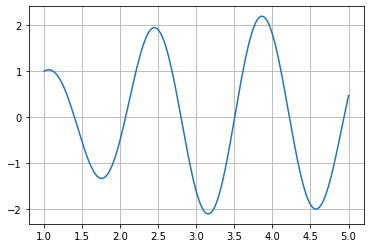

In [33]:
def f(x):
    return 44*np.sin(4*x)+4*np.cos(4*x)-5*np.sin(5*x)


y0=[1,1,-15]
h = 0.001

def func(y,x): 
    d=44*np.sin(4*x)+4*np.cos(4*x)-5*np.sin(5*x)-y[2]-25*y[1]-20*y[0]
    return [y[1],y[2],d] 

x = np.linspace(A,B,int((B-A)/h)+1)
y_tocnh=odeint(func, y0, x)
print(y_tocnh)
plt.plot (x,y_tocnh[:,0])
plt.grid('True')
plt.show()

Рунге-Кутты 3го порядка:


In [34]:
def RungeKutta3Ord(A, h, ys):
    for i in range(len(ys[0])-1):
        for d in range(3):
            if d == 0: 
                k1, k2, k3 = K1(h,ys[1][i])
            if d == 1:
                k1, k2, k3 = K2(h,ys[2][i])
            if d == 2:
        k1, k2, k3 = K3(i, h, A, ys[0][i],ys[1][i],ys[2][i])
        ys[d][i + 1] = ys[d][i] + h*(c1*k1 + c2*k2 + c3*k3)
return ys 



Сделаем замену y1 - y', y2 - y'', y3 - y'''

In [35]:
def Dec(A,B,h, y1, y2, y3):
    t = np.linspace (A , B, int((B-A)/h)+1)
    y = np.zeros((3,len(t)))
    y[0][0] = y1
    y[1][0] = y2
    y[2][0] = y3
    y = RungeKutta3Ord(A, h, y)
return y[0],t, y[1], y[2]

Решаем задачу Коши методом Рунге-Кутты 3го порядка

In [39]:

def Koshi(A, B, h, eps, p , pr1, pr2, pr3):
    y,t2, y_p2, y_p3 = Dec(A,B,h, pr1, pr2, pr3)
    h = h / 2
    y2,t2, y_p4, y_p5= Dec(A,B,h, pr1, pr2, pr3)
    pog,r = Runge(y, y2, p)
    while(r>eps):
        y=y2
        h = h / 2
        y2,t2, y_p4, y_p5 =  Dec(A,B,h, pr1, pr2, pr3)
        pog,r = Runge(y, y2, p)
    return y2,t2,h, y_p4, y_p5, pog

eps = 10**(-3)
#A=0
#B=1
A=1
B=5
p=3
y_new,t_new,h_new, y_new1, y_new11,r_new = Koshi(A, B, h, eps, p, b1, b2, b3)  
print("Решение задачи на всем отрезке")
print("Решение: ",y_new)
#print("Значения t: ",t_new)
print("С шагом: ",h_new)
(B-A)/h_new

Решение задачи на всем отрезке
Решение:  [1.         1.00001563 1.00003125 ... 0.47210247 0.47221961 0.47233673]
С шагом:  1.5625e-05


256000.0

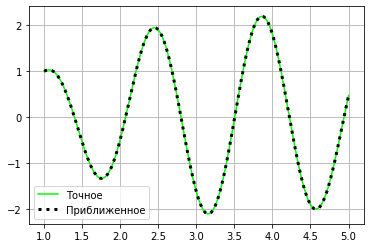

In [40]:
plt.plot(x,y_tocnh[:,0], color = 'lime', label='Точное')
plt.plot(t_new, y_new, linestyle=":", lw=3, color = 'black', label='Приближенное' ) 
plt.legend()
plt.grid('True')
plt.show()

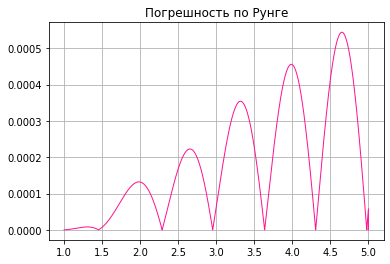

In [41]:
#plt.plot(x,y_tocnh[:,0], color = 'lime', label='Точное')
p= np.linspace (A , B, len(r_new))
plt.plot(p, r_new, lw=1,color='deeppink') 
plt.title('Погрешность по Рунге')
plt.grid('True')
plt.show()

Решение задачи с использованием адаптивных процедур


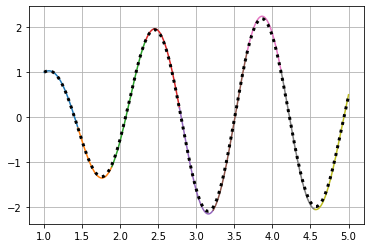

Шаги на отрезках [0.00125, 0.00015625, 0.00015625, 0.000625, 7.8125e-05, 0.00015625, 0.0003125, 7.8125e-05, 0.00015625]


In [43]:
h=0.01
eps1=10**(-3)
def adaptive(A,B,n):
    T = np.linspace (A , B, n)
    H = []
    for i in range(len(T)-1):
        if (i==0):
            pr1 = b1
            pr2 = b2
            pr3 = b3
            y_ad,t_ad,h_ad, y_p4, y_p5,pog = Koshi(T[i],T[i+1],h, eps1, 3, pr1, pr2, pr3)
            H.append(h_ad)
            plt.plot(t_ad, y_ad)
            plt.grid('True')
    else:
        pr1 = y_ad[len(t_ad)-1]
        pr2 = y_p4[len(t_ad)-1]
        pr3 = y_p5[len(t_ad)-1]
        y_ad,t_ad,h_ad, y_p4, y_p5,pog = Koshi(T[i],T[i+1],h, eps1, 3, pr1, pr2, pr3)
        H.append(h_ad)
        plt.plot(t_ad, y_ad)
        plt.grid('True')

plt.plot(x,y_tocnh[:,0],linestyle=":", lw=3, color = 'black', label='Точное решение')
  #plt.title('10 разбиений отрезка')
    plt.show()
    print("Шаги на отрезках", H)
    return 

print("Решение задачи с использованием адаптивных процедур")
adaptive(A, B, 10)

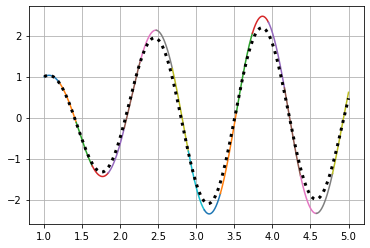

Шаги на отрезках [0.0025, 0.005, 0.000625, 0.00125, 0.005, 0.000625, 0.000625, 0.0025, 0.000625, 0.000625, 0.00125, 0.000625, 0.0003125, 0.000625, 0.00125, 0.000625, 0.000625, 0.0025, 0.000625]


In [44]:
adaptive(A, B, 20)

Это главный тестовый: